In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score 

In [2]:
data=pd.read_csv("Train_dataset_.csv")
data.shape

(7383, 15)

In [3]:
data.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987851
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [4]:
data.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
count,7345.000000,7321.000000,7322.000000,7149.000000,7.115000e+03,6984.000000,7007.000000,7312.000000,7306.000000,7298.000000,7358.000000,7383.000000
mean,486.188167,24218.079195,54.746004,105.543623,1.041827e+07,5.436840,0.140654,0.038496,33.991103,0.944722,4.996782,569.522650
std,278.280638,19602.174448,25.865877,55.284466,5.689059e+06,1.655755,0.384544,0.013406,34.036816,0.202732,2.616719,423.896621
min,5.250000,3351.280000,10.010000,10.020000,5.291170e+05,2.560000,-0.430000,0.015200,1.000000,0.600000,0.450000,10.573482
25%,247.100000,11270.150000,32.722500,57.630000,5.577644e+06,4.020000,0.030000,0.026900,1.000000,0.770000,2.762500,223.516594
50%,488.380000,12765.840000,54.510000,105.770000,1.048238e+07,5.440000,0.110000,0.038400,17.700000,0.940000,5.020000,458.716483
75%,724.020000,38182.080000,77.397500,154.130000,1.529882e+07,6.870000,0.230000,0.050200,74.900000,1.120000,7.217500,827.927051
max,965.210000,55722.000000,99.980000,199.970000,2.015445e+07,8.330000,0.780000,0.061500,74.900000,1.290000,9.560000,1970.400563


In [5]:
pd.isnull(data).sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

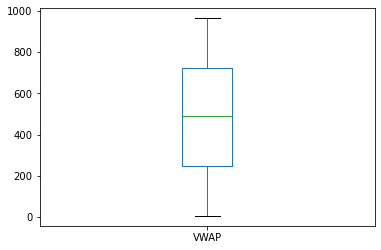

In [6]:
data['VWAP'].plot.box()

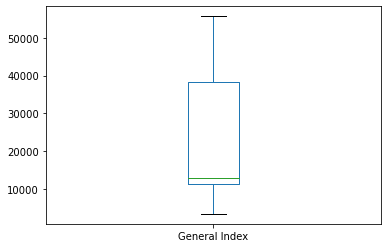

In [7]:
data['General Index'].plot.box()

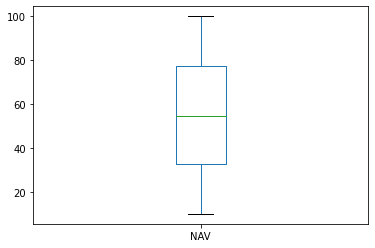

In [8]:
data['NAV'].plot.box()

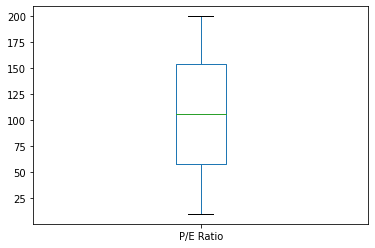

In [9]:
data['P/E Ratio'].plot.box()

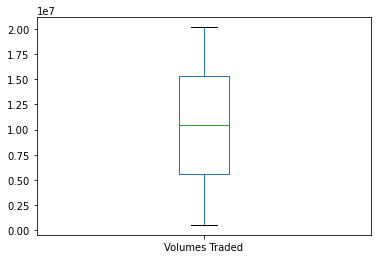

In [10]:
data['Volumes Traded'].plot.box()

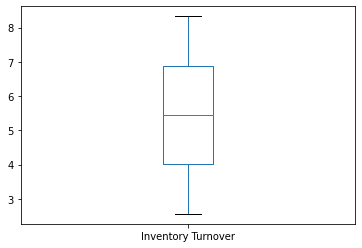

In [11]:
data['Inventory Turnover'].plot.box()

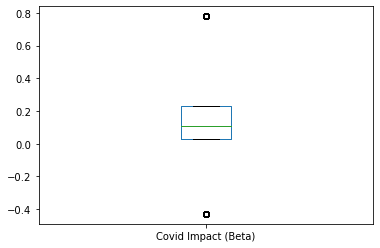

In [12]:
data['Covid Impact (Beta)'].plot.box()

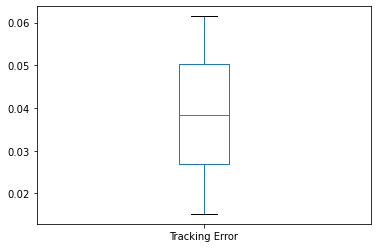

In [13]:
data['Tracking Error'].plot.box()

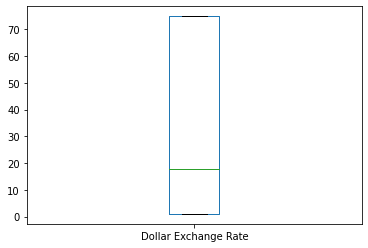

In [14]:
data['Dollar Exchange Rate'].plot.box()

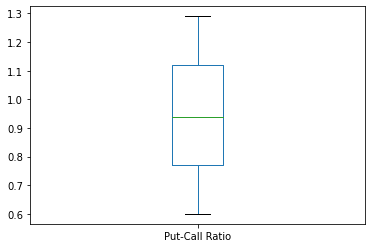

In [15]:
data['Put-Call Ratio'].plot.box()

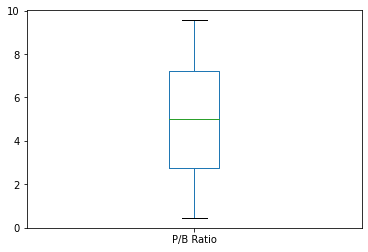

In [16]:
data['P/B Ratio'].plot.box()

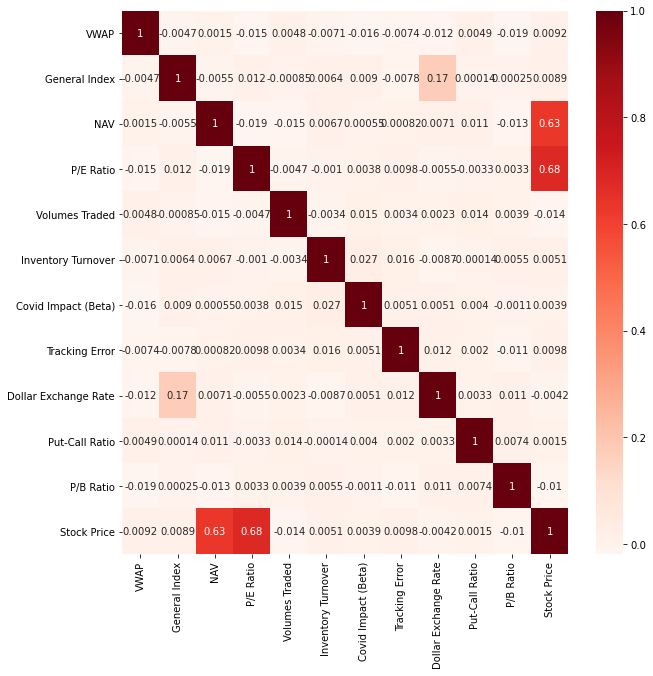

In [17]:
plt.figure(figsize=(10,10))
X = data.drop("Stock Price",1)
cor =data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
data['VWAP']=data['VWAP'].fillna(data['VWAP'].median())

In [19]:
data['General Index']=data['General Index'].fillna(data['General Index'].median())

In [20]:
data['NAV']=data['NAV'].fillna(data['NAV'].median())

In [21]:
data['P/E Ratio']=data['P/E Ratio'].fillna(data['P/E Ratio'].median())

In [22]:
data['Volumes Traded']=data['Volumes Traded'].fillna(data['Volumes Traded'].median())

In [23]:
data['Inventory Turnover']=data['Inventory Turnover'].fillna(data['Inventory Turnover'].median())

In [24]:
Q1 = np.percentile(data['Covid Impact (Beta)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Covid Impact (Beta)'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
data.loc[data['Covid Impact (Beta)']<(Q1-1.5*IQR)]=np.median(data['Covid Impact (Beta)'])
data.loc[data['Covid Impact (Beta)']>(Q3+1.5*IQR)]=np.median(data['Covid Impact (Beta)'])

In [25]:
data['Covid Impact (Beta)']=data['Covid Impact (Beta)'].fillna(data['Covid Impact (Beta)'].median())

In [26]:
data['Tracking Error']=data['Tracking Error'].fillna(data['Tracking Error'].median())

In [27]:
data['Dollar Exchange Rate']=data['Dollar Exchange Rate'].fillna(data['Dollar Exchange Rate'].median())

In [28]:
data['Put-Call Ratio']=data['Put-Call Ratio'].fillna(data['Put-Call Ratio'].median())

In [29]:
data['P/B Ratio']=data['P/B Ratio'].fillna(data['P/B Ratio'].median())

In [30]:
data=data.drop('Stock Index',axis=1)

In [31]:
data_train_in=pd.get_dummies(data.drop('Stock Price',axis=1))

In [32]:
pc=pd.read_csv("Put-Call_TS.csv")

In [33]:
pc['10-Aug']=pc['10-Aug'].fillna(pc['10-Aug'].median())

In [34]:
pc['11-Aug']=pc['11-Aug'].fillna(pc['11-Aug'].median())

In [35]:
pc['12-Aug']=pc['12-Aug'].fillna(pc['12-Aug'].median())

In [36]:
pc['13-Aug']=pc['13-Aug'].fillna(pc['13-Aug'].median())

In [37]:
pc['14-Aug']=pc['14-Aug'].fillna(pc['14-Aug'].median())

In [38]:
pc['15-Aug']=pc['15-Aug'].fillna(pc['15-Aug'].median())

In [39]:
pc['16-Aug']=(pc['10-Aug']+pc['11-Aug']+pc['12-Aug']+pc['13-Aug']+pc['14-Aug']+pc['15-Aug'])/6

In [40]:
test=pd.read_csv("Test_Aug10.csv")

In [41]:
test=test.drop('Put-Call Ratio',axis=1)

In [42]:
test['Put-Call Ratio']=pc['16-Aug']

In [43]:
test.describe()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,P/B Ratio,Put-Call Ratio
count,3319.000000,3060.000000,3056.000000,3039.000000,3.283000e+03,3301.000000,3300.000000,3205.000000,3188.000000,3193.000000,3331.000000
mean,488.572588,25099.383680,54.257196,104.731629,1.018308e+07,5.422872,0.139082,0.038340,33.459504,5.002543,1.051358
std,281.559056,19886.618464,26.184335,54.231743,5.645921e+06,1.669301,0.385717,0.013208,33.718657,2.617696,0.305617
min,5.490000,3351.280000,10.100000,10.050000,5.244620e+05,2.560000,-0.430000,0.015200,1.000000,0.450000,0.522411
25%,241.245000,11270.150000,31.100000,59.050000,5.282625e+06,3.990000,0.030000,0.027000,1.000000,2.700000,0.788849
50%,488.410000,12765.840000,54.170000,104.550000,1.019403e+07,5.430000,0.110000,0.038600,17.700000,4.990000,1.039614
75%,739.465000,38182.080000,77.002500,151.110000,1.507125e+07,6.850000,0.230000,0.049900,74.900000,7.230000,1.306052
max,965.080000,55722.000000,99.960000,199.970000,2.013252e+07,8.330000,0.780000,0.061500,74.900000,9.560000,1.603835


In [44]:
test['VWAP']=test['VWAP'].fillna(test['VWAP'].median())

In [45]:
test['General Index']=test['General Index'].fillna(test['General Index'].median())

In [46]:
test['NAV']=test['NAV'].fillna(test['NAV'].median())

In [47]:
test['P/E Ratio']=test['P/E Ratio'].fillna(test['P/E Ratio'].median())

In [48]:
test['Volumes Traded']=test['Volumes Traded'].fillna(test['Volumes Traded'].median())

In [49]:
test['Inventory Turnover']=test['Inventory Turnover'].fillna(test['Inventory Turnover'].median())

In [50]:
Q1 = np.percentile(test['Covid Impact (Beta)'], 25, interpolation = 'midpoint')
Q3 = np.percentile(test['Covid Impact (Beta)'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
test.loc[test['Covid Impact (Beta)']<(Q1-1.5*IQR)]=np.median(test['Covid Impact (Beta)'])
test.loc[test['Covid Impact (Beta)']>(Q3+1.5*IQR)]=np.median(test['Covid Impact (Beta)'])

In [51]:
test['Covid Impact (Beta)']=test['Covid Impact (Beta)'].fillna(test['Covid Impact (Beta)'].median())

In [52]:
test['Tracking Error']=test['Tracking Error'].fillna(test['Tracking Error'].median())

In [53]:
test['Dollar Exchange Rate']=test['Dollar Exchange Rate'].fillna(test['Dollar Exchange Rate'].median())

In [54]:
test['Put-Call Ratio']=test['Put-Call Ratio'].fillna(test['Put-Call Ratio'].median())

In [55]:
test['P/B Ratio']=test['P/B Ratio'].fillna(test['P/B Ratio'].median())

In [56]:
data_test_in=pd.get_dummies(test.drop('Stock Index',axis=1))

In [57]:
out= pd.DataFrame(columns = ['Stock Price'])

In [58]:
from sklearn.linear_model import LinearRegression

linreg_t1= LinearRegression()


In [59]:
linreg_t1.fit(data_train_in,data['Stock Price'])


LinearRegression()

In [60]:
out['Stock Price']=linreg_t1.predict(data_test_in)


In [61]:
out['Stock Index']=test['Stock Index']

In [62]:
out[['Stock Index','Stock Price']].to_csv('solution_part2.csv',index=False)

In [63]:
d=pd.read_csv('solution_part2.csv')

In [64]:
d

,Stock Index,Stock Price
0,AC3235,844.465062
1,AC3236,380.779828
2,AC3237,1284.341276
3,AC3238,831.710096
4,AC3239,339.988422
...,...,...
3326,AD2734,155.127507
3327,AD2735,563.433430
3328,AD2736,529.106253
3329,AD2737,567.987005
